# Lab Assignment 4

## Ivan Nikitin, s2891847



## Task 1 (5 marks)

Give your implementation of the `plot_approx` and `approx_fourier` functions from Lab 4.

Use them to produce a plot of a Fourier series approximation of the function defined by

$$
f(x)=\left\{\begin{array}{ll}
-\frac{1}{2} x & -2 \leq x<0 \\
2 x-\frac{1}{2} x^2 & 0 \leq x<2
\end{array} \quad f(x+4)=f(x)\right.
$$

using the first 10 terms of the Fourier series.

Also include a piecewise plot of $f(x)$ for a single interval of periodicity.

In [38]:
import sympy as sym
import sympy.plotting as sym_plot
sym.init_printing()
from IPython.display import display_latex

In [2]:
def approx_fourier(f, L, num_terms): 
    a0 = (1/L)*sym.integrate(f, (x, -L, L))
    an = (1/L)*sym.integrate(f*sym.cos(n*sym.pi*x/L), (x, -L, L))
    bn = (1/L)*sym.integrate(f*sym.sin(n*sym.pi*x/L), (x, -L, L))
    
    f_approx = a0/2 + sym.Sum(an*sym.cos(n*sym.pi*x/L)+bn*sym.sin(n*sym.pi*x/L), (n,1,num_terms))
    
    return f_approx.doit()

In [3]:
def plot_approx(f, L, num_terms):
    g_plot = sym_plot.plot((approx_fourier(f, L, num_terms),(x,-2*L,2*L)), (f,(x,-L,L)), show  = False)
    g_plot[0].line_color = "blue"
    g_plot[0].label = "Fourier approximation of f(x)"
    g_plot[1].line_color = "red"
    g_plot[1].label = "Function f(x)"
    g_plot.legend = True
    g_plot.show()

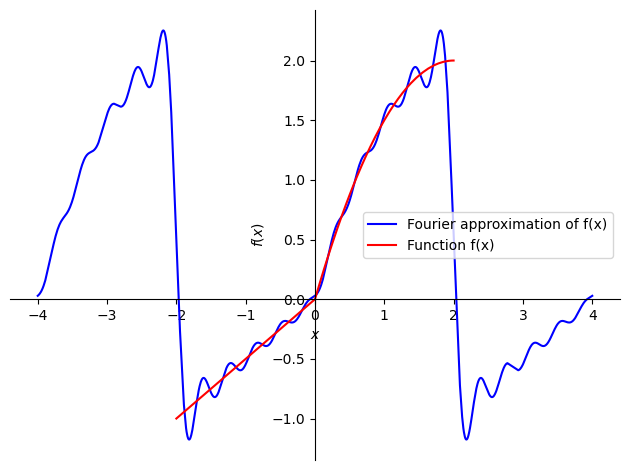

In [67]:
x,n = sym.symbols('x, n')
F = sym.Piecewise((sym.Rational(1,2)*x, (x<0)&(x>=-2)), (2*x-sym.Rational(1,2)*(x**2), (0<=x)&(x<2)))

plot_approx(F, 2, 10)

## Task 2 (5 marks)

Solve Exercise $3.1$ from Lab 4 , but with the initial condition

$$
u(x, 0)=f(x)= \begin{cases}1 & L / 2-1<x<L / 2+1 \\ 0 & \text { otherwise. }\end{cases}
$$

Note that to ensure the code runs in reasonable time, you should use $L=10$ and run the animation for $0 \leq t \leq 20$, with only 2 frames per second. You should use at least 200 terms of the series solution in order to obtain a good approximation.
Describe the behaviour of the solution.

We are solving the wave equation $a^2u_{xx}=u_{tt}$ with fixed ends given by the boundary conditions and the intial condition written above. 
The solution is in the form:
$$u(x,t)=\sum_{n=1}^\infty c_nu_n(x,t)=\sum_{n=1}^\infty c_n\sin\frac{n\pi x}{L}\cos\frac{n\pi at}{L}$$

where

$$c_n=\frac{2}{L}\int_{0}^{L}f(x)\sin\frac{n\pi x}{L}\,dx$$

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

In [61]:
L = 10
a = 1
f = sym.Piecewise((1, (x < L/2 + 1) & (x > L/2 - 1)), (0, True))

t = sym.symbols('t')
x = sym.symbols('x')
n = sym.symbols('n', integer=True, positive=True) #by stating that n is a positive integer I escape ugly output for cn with a lot of unnecessary conditions on n 

# there is no need to integrate from 0 to L since f(x)=0 if x is not in [4,6]. 

cn = sym.Rational(2,L)*sym.integrate(sym.sin(n*sym.pi*x/L), (x, sym.Rational(L,2) - 1, sym.Rational(L,2) + 1))
sym.simplify(cn)


We can clearly see a trigonometric formula for product of two sins: $\cos{(\frac{2n\pi}{5})}-\cos{(\frac{3n\pi}{5})} = 2\sin{(\frac{n\pi}{2})}\sin{(\frac{n\pi}{10})}$, therefore $c_n = \frac{4}{n\pi}\sin{(\frac{n\pi}{2})}\sin{(\frac{n\pi}{10})} $

Notice that for n even $c_n=0$, so we can skip them, since they do not contribute to the final sum. For that I will define n using new variable k like $n=2k-1$ so our sum will go from 1 too 100 instead. I will now rewrite previous code.

In [62]:
L = 10
a = 1
f = sym.Piecewise((1, (x < L/2 + 1) & (x > L/2 - 1)), (0, True))

t = sym.symbols('t')
x = sym.symbols('x')
n = sym.symbols('n', integer=True, positive=True) 

k = sym.symbols('k', integer=True, positive=True)
n = 2*k - 1

cn = sym.Rational(2,L)*sym.integrate(sym.sin(n*sym.pi*x/L), (x, sym.Rational(L,2) - 1, sym.Rational(L,2) + 1))
sym.simplify(cn)

u_symbolic = sym.Sum(cn*sym.sin(n*sym.pi*x/L)*sym.cos(n*sym.pi*a*t/L), (k,1,100)) # n takes only odd values 
display_latex(u_symbolic)

In [66]:
fps = 2 # number of frames per second 

fig, ax = plt.subplots()

x_vals = np.linspace(0,L,200)

u = sym.lambdify([x, t], u_symbolic, modules='numpy')


line, = ax.plot(x_vals, u(x_vals,0), 'k-')
plt.plot(x_vals,u(x_vals,0),'r:')
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.ylim(-1.2,1.2)

plt.close()
txt = ax.text(0, 0.9, 't=0')

def init():
    line.set_ydata(u(x_vals,0))
    return line,

def animate(i):
    line.set_ydata(u(x_vals,i/fps)) 
    txt.set_text('t='+str(i/fps))
    return line, txt


ani = animation.FuncAnimation(fig, animate, np.arange(0, fps*40+1), init_func=init,
                             interval=10, blit=True, repeat=False)

Excluding even values of n contributed **significantly** to time needed to calculate the animation.

In [64]:
HTML(ani.to_jshtml())

In this case for each $t_0$ function $u(x,t_0)$ is a step-function itself. Rigorous proof would take a lot of time but in fact this happens because the achieved sum converges to $\frac{1}{2}(f(x-t)+f(x+t))$ where f(x) is an odd periodic extension of the original step function. For example, we can check that it is true for $t=2.5$

$$u(x,2.5)=\frac{1}{2}(f(x-2.5)+f(x+2.5))= \begin{cases} \frac{1}{2} & 6.5 <x< 8.5 \lor 1.5<x<3.5 \\ 0 & \text { otherwise. }\end{cases}$$

If two separate intervals where $f(x-t)$ and $f(x+t)$ both equal to 1 overlap, for x in that intesaction of $u(x,u)=1$ or $u(x,u)=-1$ . For other t it is either $\frac{1}{2}$ or $0$. 